In [10]:
import numpy as np
import pandas as pd
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.bats import BATS
from sktime.forecasting.croston import Croston
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA

import math
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [12]:
data = "new_data/data_set.csv"
df = pd.read_csv(data,engine="python",encoding='utf-8')
df['日期'] = pd.to_datetime(df['日期']).dt.normalize()
df = df.set_index('日期')
df = df.sort_index(ascending=True)

In [13]:
X1 = pd.Series(df['增长'].values, index=df.index)
X1_month = X1.resample('BM').bfill()
X1_month.index = X1_month.index.to_period()
X1_month = X1_month.bfill()

In [76]:
xx = X1_month.diff(12)
xx.fillna(0,inplace=True)
x = xx/(X1_month - xx)
print(x[10:])

2010-01    0.000000
2010-02    0.000000
2010-03    0.500399
2010-04    0.344966
2010-05    0.187309
             ...   
2021-08    0.127858
2021-09    0.126889
2021-10    0.139075
2021-11    0.057539
2021-12    0.049319
Freq: M, Length: 144, dtype: float64


In [69]:
X2 = pd.Series(df['汇率'].values, index=df.index)
X2_month = X2.resample('BM').bfill()
X2_month.index = X2_month.index.to_period()
X2_month = X2_month.bfill()

In [6]:
X3 = pd.Series(df['利率'].values, index=df.index)
X3_month = X3.resample('BM').bfill()
X3_month.index = X3_month.index.to_period()
X3_month = X3_month.bfill()

In [71]:
X4 = pd.Series(df['通胀_生活端'].values, index=df.index)
X4_month = X4.resample('BM').bfill()
X4_month.index = X4_month.index.to_period()
X4_month = X4_month.bfill()

In [8]:
X5 = pd.Series(df['通胀_生产端'].values, index=df.index)
X5_month = X5.resample('BM').bfill()
X5_month.index = X5_month.index.to_period()
X5_month = X5_month.bfill()

In [9]:
X = pd.DataFrame({'增长':X1_month,'汇率':X2_month, '利率':X3_month, '通胀_生活端':X4_month, '通胀_生产端':X5_month})

In [10]:
myData = [[row['增长'], row['汇率'], row['利率'], row['通胀_生活端'],row['通胀_生产端']]for index, row in X.iterrows()]
myData
len(myData)

154

[Text(0.5, 1.0, 'Increasing factor')]

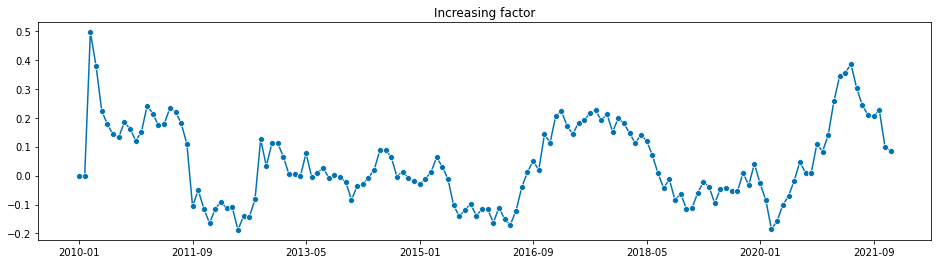

In [23]:
fig1, ax1 = plot_series(xx[10:])
ax1.set(title='Increasing factor' )

          A         B
A  1.000000  0.302817
B  0.302817  1.000000


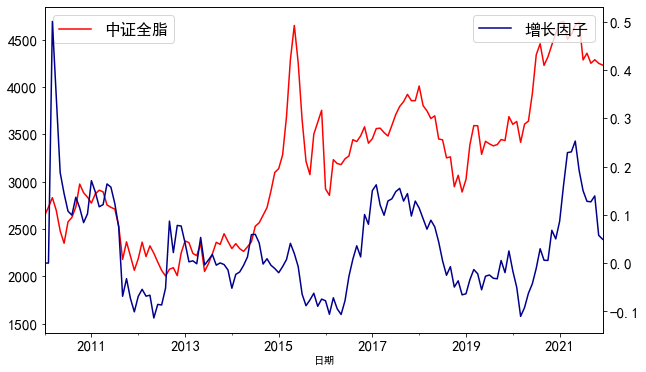

In [77]:
import matplotlib.pyplot as plt
c_data = 'stock_index/H30374.csv'
df_c = pd.read_csv(c_data,engine="python",encoding='utf-8')
df_c['日期'] = pd.to_datetime(df_c['日期']).dt.normalize()
df_c = df_c.set_index('日期')
df_c = df_c.sort_index(ascending=True)
df_c = pd.Series(df_c['收盘价'].values, index=df_c.index)
df_c = df_c.resample('BM').bfill()
df_c.index = df_c.index.to_period()

plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei']

fig,left_axis=plt.subplots(figsize = (10,6))

df_c.plot(color = 'red')

plt.legend(labels = [u"中证全脂"], loc = 'upper left', fontsize=16)
plt.tick_params(labelsize=15)

right_axis = left_axis.twinx()
x[10:].plot(color = 'darkblue')
label = [u"增长因子"]
plt.legend(label, loc = 'upper right', fontsize =16, ncol = 2)
plt.tick_params(labelsize=15)


data = pd.DataFrame({'A':df_c, 
                     'B':xx})
print(data.corr('spearman'))

[Text(0.5, 1.0, 'Exchange Rate factor')]

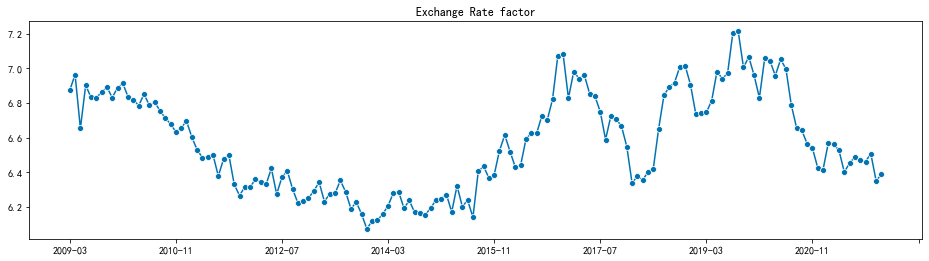

In [70]:
fig, ax = plot_series(X2_month)
ax.set(title='Exchange Rate factor' )

[Text(0.5, 1.0, 'Rate factor')]

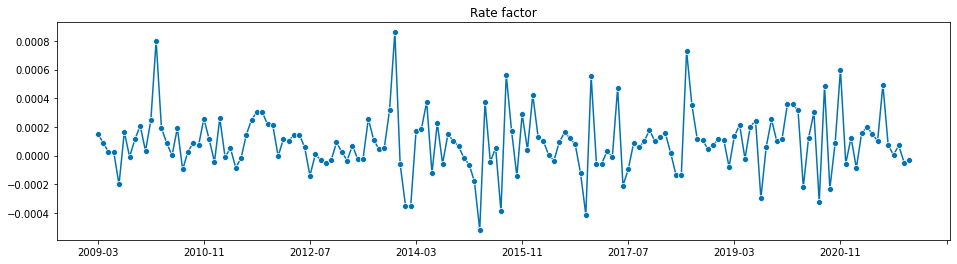

In [13]:
fig, ax = plot_series(X3_month)
ax.set(title='Rate factor' )

          A         B
A  1.000000 -0.088662
B -0.088662  1.000000


[Text(0.5, 1.0, 'Inflation_Life factor')]

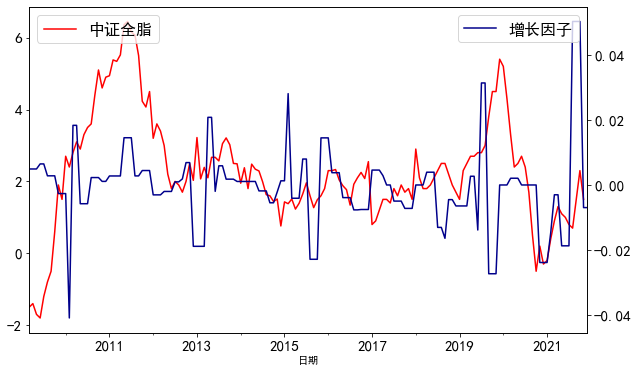

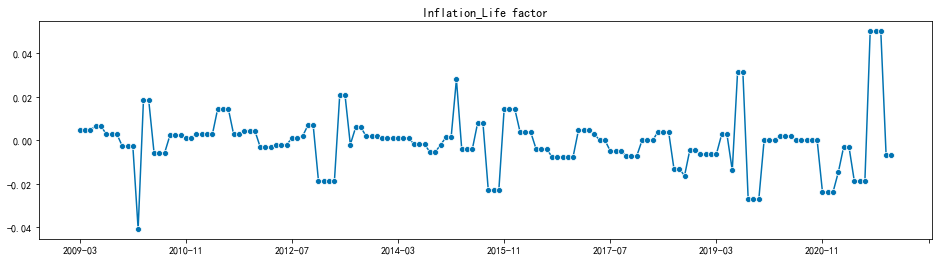

In [75]:
import matplotlib.pyplot as plt
c_data = 'new_data/CPI.csv'
df_c = pd.read_csv(c_data,engine="python",encoding='utf-8')
df_c['日期'] = pd.to_datetime(df_c['日期']).dt.normalize()
df_c = df_c.set_index('日期')
df_c = df_c.sort_index(ascending=True)
df_c = pd.Series(df_c['CPI'].values, index=df_c.index)
df_c = df_c.resample('BM').bfill()
df_c.index = df_c.index.to_period()

plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei']

fig,left_axis=plt.subplots(figsize = (10,6))

df_c.plot(color = 'red')

plt.legend(labels = [u"中证全脂"], loc = 'upper left', fontsize=16)
plt.tick_params(labelsize=15)

right_axis = left_axis.twinx()
X4_month.plot(color = 'darkblue')
label = [u"增长因子"]
plt.legend(label, loc = 'upper right', fontsize =16, ncol = 2)
plt.tick_params(labelsize=15)


data = pd.DataFrame({'A':df_c, 
                     'B':xx})
print(data.corr('spearman'))

fig, ax = plot_series(X4_month)
ax.set(title='Inflation_Life factor' )

[Text(0.5, 1.0, 'Inflation_Production factor')]

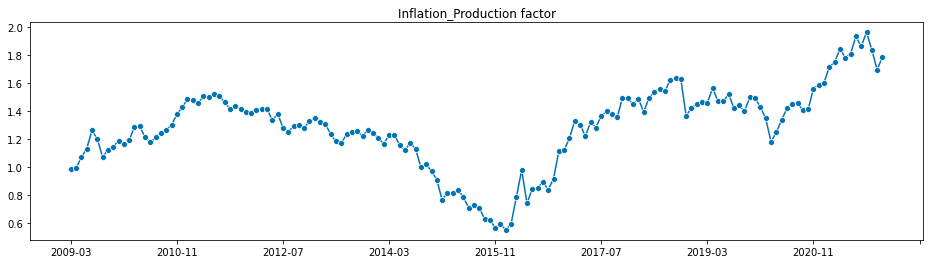

In [15]:
fig, ax = plot_series(X5_month)
ax.set(title='Inflation_Production factor' )

In [21]:
def predict_LSTM(data,d,s,j):
    X_train, X_test = temporal_train_test_split(data)
    look_back = 3
    train_data_gen = TimeseriesGenerator(X_train, X_train, length=look_back, sampling_rate=1,stride=1, batch_size=3)
    test_data_gen = TimeseriesGenerator(X_test, X_test, length=look_back, sampling_rate=1,stride=1,batch_size=1)
    
    model = Sequential()
    model.add(LSTM(d, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.add(Dropout(j))
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(train_data_gen, epochs=s).history
    
    print("mean_squared_error:",model.evaluate(test_data_gen))
    trainPredict = model.predict(train_data_gen)
    testPredict = model.predict(test_data_gen)
    
    trainY = get_y_from_generator(train_data_gen)
    testY = get_y_from_generator(test_data_gen)

    tt = trainPredict.tolist()
    k = []
    for i in tt:
        k.append(i[0])
    k = np.array(k)
    trainPredictPlot = pd.Series(k, index=X_train.index[look_back:len(trainPredict)+look_back])

    tt = testPredict.tolist()
    k = []
    for i in tt:
        k.append(i[0])
    k = np.array(k)
    testPredictPlot = pd.Series(k, index=X_test.index[look_back:])
    
    plot_series(X_train, X_test, trainPredictPlot,testPredictPlot, labels=["train", "test", "train(Predict)", "test(Predict)"])
    
    trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    predict_data = pd.concat([X_train[:look_back],trainPredictPlot])
    predict_data = pd.concat([predict_data,X_test[:look_back]])
    predict_data = pd.concat([predict_data,testPredictPlot])
    
    return predict_data

In [39]:
def predict_sktime(data):
    X_train, X_test = temporal_train_test_split(data)
    fh = np.arange(len(X_test)) + 1
    
    forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
    forecaster.fit(X_train)
    X_pred = forecaster.predict(fh)
    plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
    print(mean_squared_error(X_test, X_pred))
    
#     forecaster = ThetaForecaster(sp=12)
#     forecaster.fit(X_train)
#     X_pred = forecaster.predict(fh)
#     plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
#     print(mean_squared_error(X_test, X_pred))
    
    forecaster = AutoARIMA(sp=12, d=0, max_p=2, max_q=2, suppress_warnings=True)
    forecaster.fit(X_train)
    X_pred = forecaster.predict(fh)
    plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
    print(mean_squared_error(X_test, X_pred))
    
    forecaster = TBATS(use_box_cox=False,use_trend=False,use_damped_trend=False,sp=12,use_arma_errors=False,n_jobs=1)
    forecaster.fit(X_train)
    X_pred = forecaster.predict(fh)
    plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
    print(mean_squared_error(X_test, X_pred))
    
    forecaster = BATS(use_box_cox=False,use_trend=False,use_damped_trend=False,sp=12,use_arma_errors=False,n_jobs=1)
    forecaster.fit(X_train)
    X_pred = forecaster.predict(fh)
    plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
    print(mean_squared_error(X_test, X_pred))
    
    forecaster = Croston(smoothing=0.1)
    forecaster.fit(X_train)
    X_pred = forecaster.predict(fh)
    plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
    print(mean_squared_error(X_test, X_pred))
    
    forecaster = AutoETS(auto=True, n_jobs=-1, sp=12)
    forecaster.fit(X_train)
    X_pred = forecaster.predict(fh)
    plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
    print(mean_squared_error(X_test, X_pred))
    
    forecaster = NaiveForecaster(strategy="last")
    forecaster.fit(X_train)
    X_pred = forecaster.predict(fh)
    plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
    print(mean_squared_error(X_test, X_pred))
    
    forecaster = StatsForecastAutoARIMA(sp=12, d=0, max_p=2, max_q=2)
    forecaster.fit(X_train)
    X_pred = forecaster.predict(fh)
    plot_series(X_train, X_test, X_pred, labels=["train", "test", "pred"])
    print(mean_squared_error(X_test, X_pred))

Epoch 1/100
38/38 [==============================] - 2s 2ms/step - loss: 1.1912
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4481
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0869
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 11/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 12/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 13/100
38/38 [=================

(112, 1)
(36, 1)
Train Score: 0.04 RMSE
Test Score: 0.07 RMSE


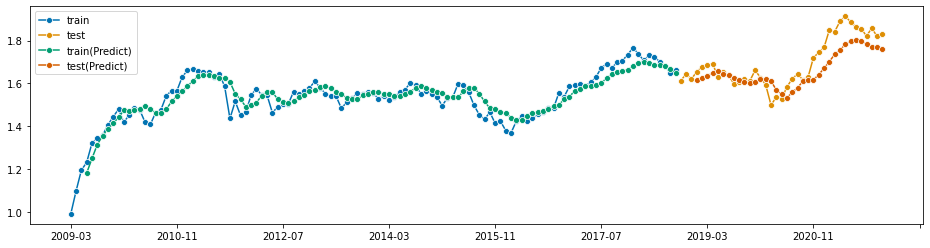

In [24]:
X1_predict_data = predict_LSTM(X1_month,10,100,0.01)

Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 25.2399
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 2.5381
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4381
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4056
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.8575
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3944
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4976
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4273
Epoch 11/100
38/38 [==============================] - 0s 2ms/step - loss: 0.7543
Epoch 12/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4554
Epoch 13/100
38/38 [================

(112, 1)
(36, 1)
Train Score: 0.12 RMSE
Test Score: 0.14 RMSE


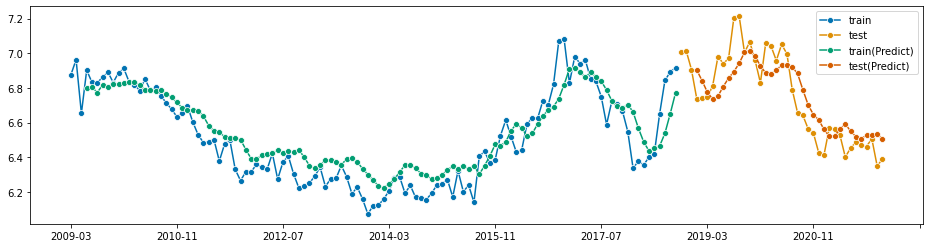

In [25]:
X2_predict_data = predict_LSTM(X2_month,60,100,0.01)

Epoch 1/500
38/38 [==============================] - 6s 109ms/step - loss: 4.4574e-05
Epoch 2/500
38/38 [==============================] - 4s 110ms/step - loss: 4.7336e-07
Epoch 3/500
38/38 [==============================] - 4s 109ms/step - loss: 6.9091e-08
Epoch 4/500
38/38 [==============================] - 4s 110ms/step - loss: 5.3015e-08
Epoch 5/500
38/38 [==============================] - 4s 109ms/step - loss: 6.9315e-08
Epoch 6/500
38/38 [==============================] - 4s 111ms/step - loss: 6.5257e-08
Epoch 7/500
38/38 [==============================] - 4s 113ms/step - loss: 6.4570e-08
Epoch 8/500
38/38 [==============================] - 4s 110ms/step - loss: 7.1865e-08
Epoch 9/500
38/38 [==============================] - 4s 111ms/step - loss: 7.9750e-08
Epoch 10/500
38/38 [==============================] - 4s 113ms/step - loss: 6.7115e-08
Epoch 11/500
38/38 [==============================] - 4s 109ms/step - loss: 1.0547e-07
Epoch 12/500
38/38 [==============================] 

38/38 [==============================] - 4s 108ms/step - loss: 8.4932e-08
Epoch 189/500
38/38 [==============================] - 4s 108ms/step - loss: 1.1043e-07
Epoch 190/500
38/38 [==============================] - 4s 108ms/step - loss: 6.3321e-08
Epoch 191/500
38/38 [==============================] - 4s 108ms/step - loss: 1.3209e-07
Epoch 192/500
38/38 [==============================] - 4s 108ms/step - loss: 9.4191e-08
Epoch 193/500
38/38 [==============================] - 4s 108ms/step - loss: 8.0742e-08
Epoch 194/500
38/38 [==============================] - 4s 108ms/step - loss: 1.1813e-07
Epoch 195/500
38/38 [==============================] - 4s 108ms/step - loss: 7.9036e-08
Epoch 196/500
38/38 [==============================] - 4s 108ms/step - loss: 5.7717e-08
Epoch 197/500
38/38 [==============================] - 4s 109ms/step - loss: 1.1764e-07
Epoch 198/500
38/38 [==============================] - 4s 108ms/step - loss: 8.5644e-08
Epoch 199/500
38/38 [=========================

38/38 [==============================] - 4s 108ms/step - loss: 1.1171e-07
Epoch 375/500
38/38 [==============================] - 4s 108ms/step - loss: 8.2558e-08
Epoch 376/500
38/38 [==============================] - 4s 108ms/step - loss: 1.2843e-07
Epoch 377/500
38/38 [==============================] - 4s 109ms/step - loss: 9.4690e-08
Epoch 378/500
38/38 [==============================] - 4s 108ms/step - loss: 9.8698e-08
Epoch 379/500
38/38 [==============================] - 4s 108ms/step - loss: 1.0954e-07
Epoch 380/500
38/38 [==============================] - 4s 108ms/step - loss: 6.4506e-08
Epoch 381/500
38/38 [==============================] - 4s 107ms/step - loss: 1.0039e-07
Epoch 382/500
38/38 [==============================] - 4s 108ms/step - loss: 6.6226e-08
Epoch 383/500
38/38 [==============================] - 4s 109ms/step - loss: 5.9335e-08
Epoch 384/500
38/38 [==============================] - 4s 108ms/step - loss: 6.5570e-08
Epoch 385/500
38/38 [=========================

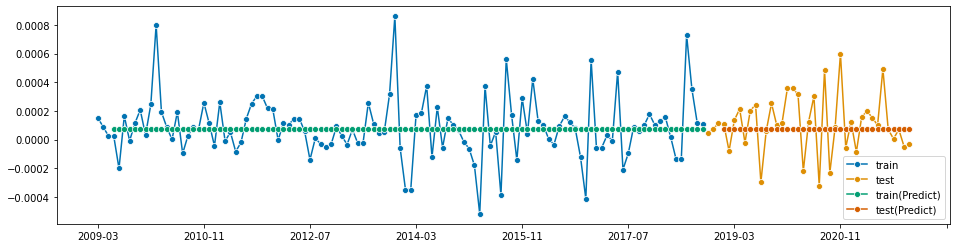

In [32]:
X3_predict_data = predict_LSTM(X3_month,2000,500,0.01)

In [31]:
X3_predict_data

2009-03    0.000153
2009-04    0.000089
2009-05    0.000026
2009-06   -0.000026
2009-07   -0.000026
             ...   
2021-08   -0.000026
2021-09   -0.000026
2021-10   -0.000026
2021-11   -0.000026
2021-12   -0.000026
Freq: M, Length: 154, dtype: float64

4.645918529602998e-08
4.076302063206946e-08
4.022304169133281e-08
4.022304169133281e-08
4.123073200113117e-08


C:\Users\DaryLLS\.conda\envs\env8\lib\site-packages\sktime\forecasting\ets.py:245: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


4.076321096782769e-08
4.014448036253846e-08
4.180867556693357e-08


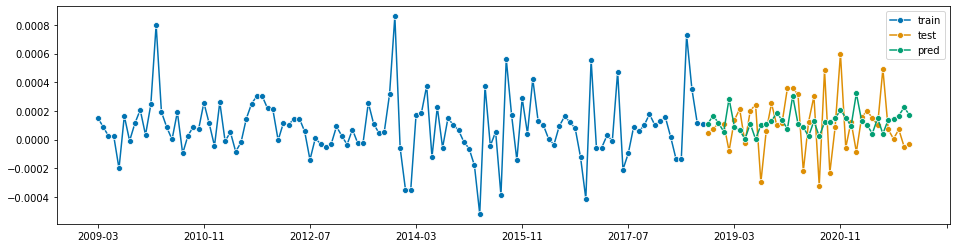

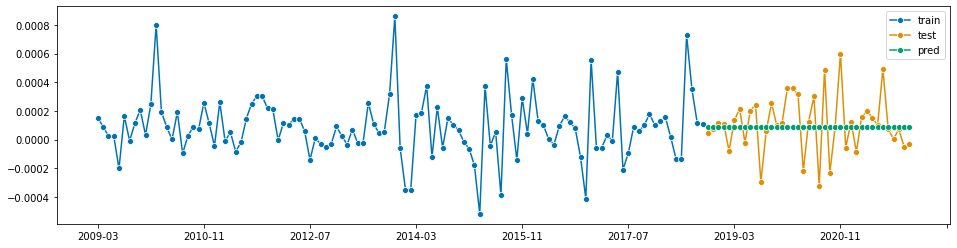

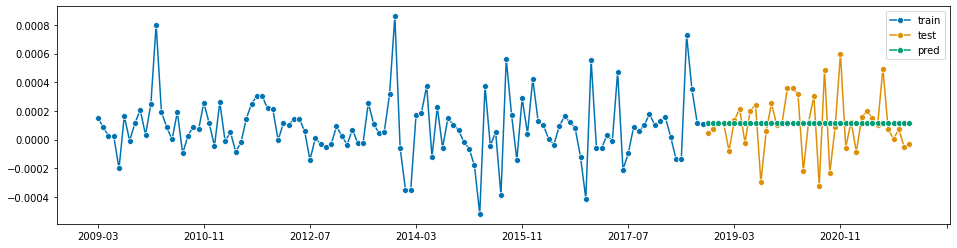

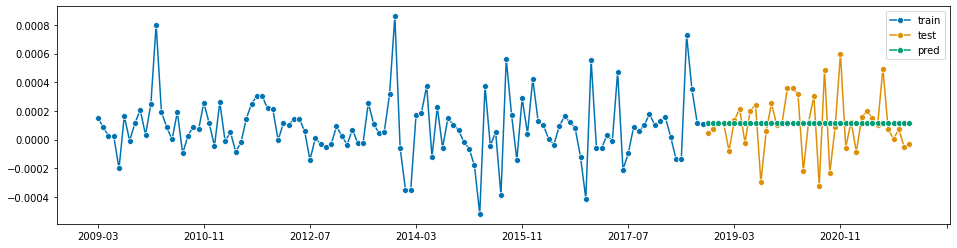

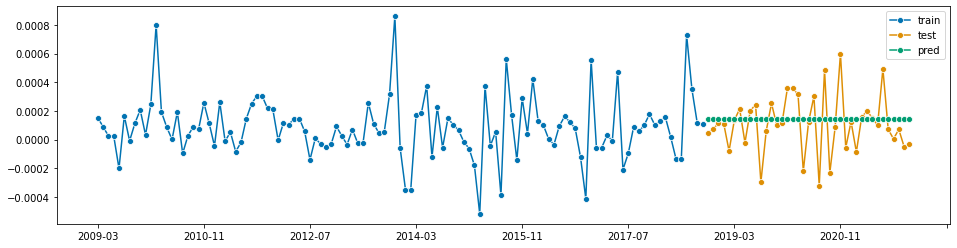

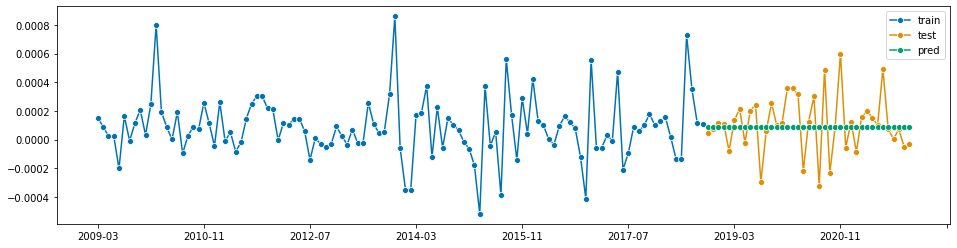

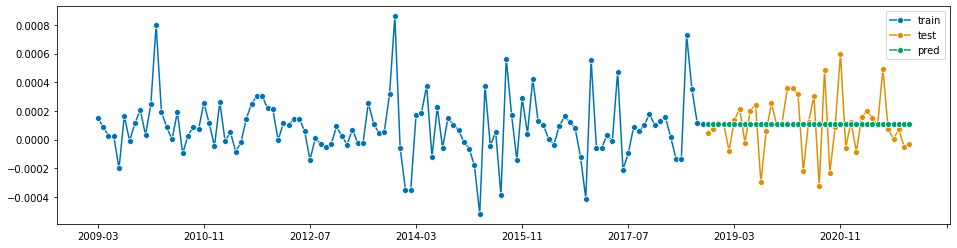

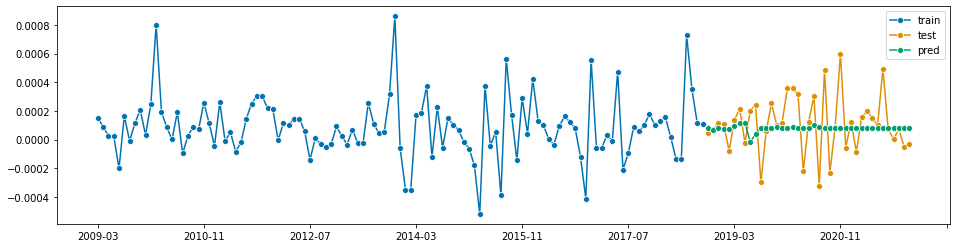

In [40]:
predict_sktime(X3_month)

Epoch 1/500
38/38 [==============================] - 2s 5ms/step - loss: 1.4457e-04
Epoch 2/500
38/38 [==============================] - 0s 5ms/step - loss: 9.9364e-05
Epoch 3/500
38/38 [==============================] - 0s 5ms/step - loss: 1.0354e-04
Epoch 4/500
38/38 [==============================] - 0s 5ms/step - loss: 1.0230e-04
Epoch 5/500
38/38 [==============================] - 0s 5ms/step - loss: 9.4424e-05
Epoch 6/500
38/38 [==============================] - 0s 6ms/step - loss: 8.9414e-05
Epoch 7/500
38/38 [==============================] - 0s 5ms/step - loss: 9.6077e-05
Epoch 8/500
38/38 [==============================] - 0s 5ms/step - loss: 9.1968e-05
Epoch 9/500
38/38 [==============================] - 0s 5ms/step - loss: 9.3784e-05
Epoch 10/500
38/38 [==============================] - 0s 5ms/step - loss: 1.0475e-04
Epoch 11/500
38/38 [==============================] - 0s 5ms/step - loss: 9.1019e-05
Epoch 12/500
38/38 [==============================] - 0s 5ms/step - loss: 

38/38 [==============================] - 0s 5ms/step - loss: 8.6005e-05
Epoch 193/500
38/38 [==============================] - 0s 5ms/step - loss: 8.3304e-05
Epoch 194/500
38/38 [==============================] - 0s 5ms/step - loss: 8.4051e-05
Epoch 195/500
38/38 [==============================] - 0s 6ms/step - loss: 8.6096e-05
Epoch 196/500
38/38 [==============================] - 0s 6ms/step - loss: 8.4031e-05
Epoch 197/500
38/38 [==============================] - 0s 5ms/step - loss: 8.6367e-05
Epoch 198/500
38/38 [==============================] - 0s 5ms/step - loss: 8.6253e-05
Epoch 199/500
38/38 [==============================] - 0s 6ms/step - loss: 8.9747e-05
Epoch 200/500
38/38 [==============================] - 0s 6ms/step - loss: 8.3941e-05
Epoch 201/500
38/38 [==============================] - 0s 6ms/step - loss: 8.5446e-05
Epoch 202/500
38/38 [==============================] - 0s 5ms/step - loss: 8.3964e-05
Epoch 203/500
38/38 [==============================] - 0s 5ms/step -

38/38 [==============================] - 0s 5ms/step - loss: 7.7077e-05
Epoch 383/500
38/38 [==============================] - 0s 5ms/step - loss: 8.6523e-05
Epoch 384/500
38/38 [==============================] - 0s 5ms/step - loss: 8.6405e-05
Epoch 385/500
38/38 [==============================] - 0s 5ms/step - loss: 8.5306e-05
Epoch 386/500
38/38 [==============================] - 0s 5ms/step - loss: 8.2693e-05
Epoch 387/500
38/38 [==============================] - 0s 5ms/step - loss: 8.6701e-05
Epoch 388/500
38/38 [==============================] - 0s 5ms/step - loss: 8.7172e-05
Epoch 389/500
38/38 [==============================] - 0s 5ms/step - loss: 8.4329e-05
Epoch 390/500
38/38 [==============================] - 0s 5ms/step - loss: 8.6622e-05
Epoch 391/500
38/38 [==============================] - 0s 5ms/step - loss: 8.2830e-05
Epoch 392/500
38/38 [==============================] - 0s 5ms/step - loss: 8.4822e-05
Epoch 393/500
38/38 [==============================] - 0s 5ms/step -

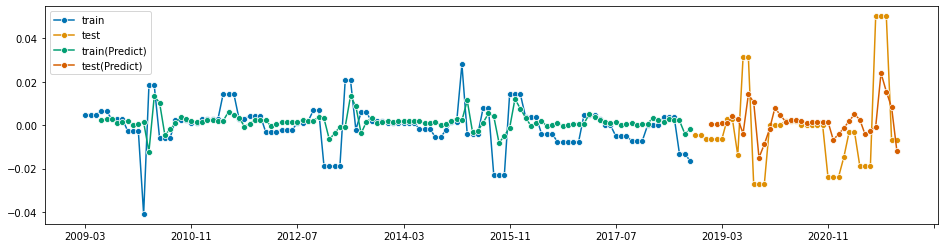

In [30]:
X4_predict_data = predict_LSTM(X4_month,400,500,0.01)

Epoch 1/500
38/38 [==============================] - 2s 5ms/step - loss: 0.2061
Epoch 2/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0140
Epoch 3/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 4/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 5/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0361
Epoch 6/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0354
Epoch 7/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0237
Epoch 8/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0282
Epoch 9/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 10/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0369
Epoch 11/500
38/38 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 12/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 13/500
38/38 [=================

38/38 [==============================] - 0s 5ms/step - loss: 0.0202
Epoch 203/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0354
Epoch 204/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 205/500
38/38 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 206/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0240
Epoch 207/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 208/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 209/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0575
Epoch 210/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 211/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 212/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 213/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 214/500
38/38 [=========

38/38 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 303/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0335
Epoch 304/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0263
Epoch 305/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0232
Epoch 306/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 307/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0255
Epoch 308/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 309/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 310/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 311/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0325
Epoch 312/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 313/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 314/500
38/38 [=========

38/38 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 403/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 404/500
38/38 [==============================] - 0s 6ms/step - loss: 0.0187
Epoch 405/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0248
Epoch 406/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0482
Epoch 407/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0269
Epoch 408/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 409/500
38/38 [==============================] - 0s 6ms/step - loss: 0.0329
Epoch 410/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 411/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0222
Epoch 412/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 413/500
38/38 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 414/500
38/38 [=========

(112, 1)
(36, 1)
Train Score: 0.07 RMSE
Test Score: 0.09 RMSE


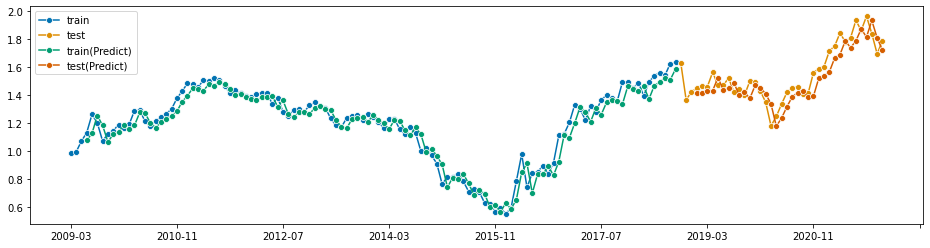

In [33]:
X5_predict_data = predict_LSTM(X5_month,400,500,0.01)